In [1]:
import torch
import numpy as np
from cmr.estimation import estimation

# Generate some data
def generate_data(n_sample):
    e = np.random.normal(loc=0, scale=1.0, size=[n_sample, 1])
    gamma = np.random.normal(loc=0, scale=0.1, size=[n_sample, 1])
    delta = np.random.normal(loc=0, scale=0.1, size=[n_sample, 1])

    z = np.random.uniform(low=-3, high=3, size=[n_sample, 1])
    t = np.reshape(z[:, 0], [-1, 1]) + e + gamma
    y = np.abs(t) + e + delta
    return {'t': t, 'y': y, 'z': z}

train_data = generate_data(n_sample=1000)
validation_data = generate_data(n_sample=1000)
test_data = generate_data(n_sample=10000)


In [2]:
# Define a PyTorch model $f$ and a moment function $\psi$
model = torch.nn.Sequential(
            torch.nn.Linear(1, 20),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(20, 3),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(3, 1)
        )

# Instrumental variable regression
def moment_function(model_evaluation, y):
    return model_evaluation - y

In [4]:
# Train the model
trained_model, stats = estimation(model=model,
                                  train_data=train_data,
                                  moment_function=moment_function,
                                  estimation_method='SMD',
                                  validation_data=validation_data,
                                  verbose=True,
                                  )
# Make prediction
y_pred = trained_model(torch.Tensor(test_data['t']))

Running hyperparams:  {}
Best hyperparams:  {}


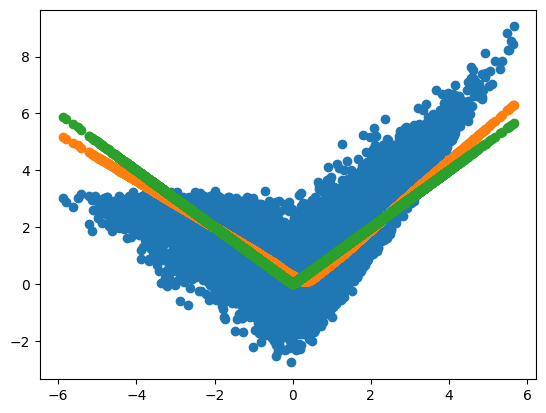

In [6]:
import matplotlib.pyplot as plt

plt.scatter(test_data['t'], test_data['y'], label='Data')
plt.scatter(test_data['t'], y_pred.detach().numpy(), label='Predicted')
plt.scatter(test_data['t'], np.abs(test_data['t']), label='True')